In [67]:
#importing libraries
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt

In [68]:
#printing dataset
df=pd.read_excel("C:\python_files\stock\data\AAPL.xlsx")
print(df)


            date        open        high         low       close  \
0     1980-12-12    0.513393    0.515625    0.513393    0.513393   
1     1980-12-15    0.488839    0.488839    0.486607    0.486607   
2     1980-12-16    0.453125    0.453125    0.450893    0.450893   
3     1980-12-17    0.462054    0.464286    0.462054    0.462054   
4     1980-12-18    0.475446    0.477679    0.475446    0.475446   
...          ...         ...         ...         ...         ...   
10058 2021-01-15  133.520000  133.611600  126.382000  127.140000   
10059 2021-01-19  133.520000  133.611600  126.382000  127.830000   
10060 2021-01-20  133.520000  133.611600  126.382000  132.030000   
10061 2021-01-20  133.520000  133.611600  126.382000  132.030000   
10062 2021-01-21  133.520000  139.670000  126.382000  136.870000   

       adjusted_close      volume  7. dividend amount  
0            0.023186   117258400                 NaN  
1            0.021977    43971200                 NaN  
2            0.

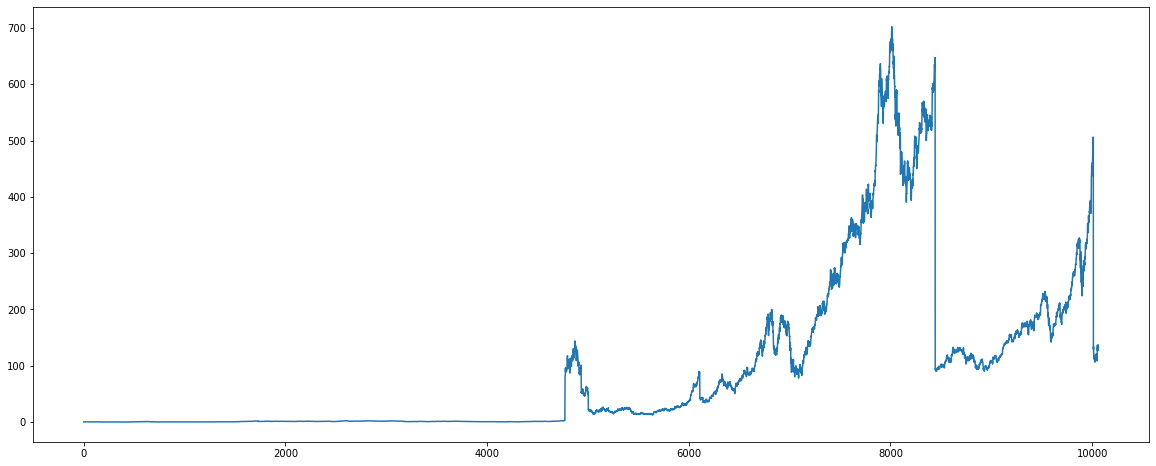

In [69]:
#visualizing close values 
plt.figure(figsize=(20,8))
plt.plot(df.close)
plt.show()

In [70]:
#filtering close values
data=df.filter(['close'])
dataset = data.values

In [71]:
#scaling the values
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
print(scaled_data)

[[0.00045158]
 [0.00041342]
 [0.00036253]
 ...
 [0.18782291]
 [0.18782291]
 [0.19471844]]


In [72]:
training_data_len = math.ceil(len(dataset)*0.8)
print(training_data_len)

8051


In [73]:
#dividing the dataset into testing and training dataset

#training dataset
train_data = scaled_data[0:training_data_len,:] 
x_train = []
y_train = []
for i in range(70,len(train_data)):
    x_train.append(train_data[i-70:i,0])
    y_train.append(train_data[i,0])
    if i<=70:
        print(x_train)
        print(y_train)

#testing dataset        
test_data = scaled_data[training_data_len-70:,:] 
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(70,len(test_data)):
    x_test.append(test_data[i-70:i,0])        

[array([0.00045158, 0.00041342, 0.00036253, 0.00037844, 0.00039752,
       0.00043886, 0.00047384, 0.00050564, 0.00054698, 0.00062331,
       0.00063603, 0.00061376, 0.00058832, 0.00059786, 0.00057878,
       0.00054062, 0.00050564, 0.00048974, 0.00053108, 0.00052472,
       0.0004961 , 0.00049928, 0.00051518, 0.00050882, 0.00055652,
       0.00053108, 0.00054698, 0.00055652, 0.00055334, 0.00054062,
       0.00053426, 0.00050882, 0.0004802 , 0.00043886, 0.00039752,
       0.00042296, 0.0004484 , 0.0004484 , 0.00045158, 0.00041342,
       0.00041342, 0.00039116, 0.0003848 , 0.00036889, 0.0003848 ,
       0.00041342, 0.00037207, 0.00033709, 0.00034663, 0.00032437,
       0.00036253, 0.00037207, 0.00039434, 0.00039752, 0.00038798,
       0.00038162, 0.00037844, 0.00037207, 0.00032119, 0.00029257,
       0.00027031, 0.00029257, 0.00028621, 0.00030847, 0.00033709,
       0.00037526, 0.00036889, 0.00037526, 0.0004007 , 0.00039752])]
[0.0003847954476832025]


In [74]:
#converting arrays to numpy array
x_train = np.array(x_train)
y_train = np.array(y_train)

In [75]:
#reshaping data into three dimensional data because LSTM model expects three dimensional data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print(x_train.shape)

(7981, 70, 1)


In [76]:
#initializing the model
model =Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(25))
model.add(Dense(1))

In [77]:
#compiling the model
model.compile(optimizer="adam",loss="mean_squared_error")

In [78]:
#fitting the model according to the dataset
model.fit(x_train,y_train,batch_size=1,epochs=1)

7981/7981 [==============================] - 152s 19ms/step - loss: 0.0018


In [79]:
#converting x_test into numpy format
x_test = np.array(x_test)
print(x_test.shape)

(2012, 70)


In [80]:
#reshaping data into three dimensional data because LSTM model expects three dimensional data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
print(x_test.shape)

(2012, 70, 1)


In [81]:
#get model's predicted prices
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [82]:
#evaluating root mean squared error
evel = np.sqrt(np.mean(predictions-y_test)**2)
print(evel)

25.1417079806925


<ipython-input-83-49285a2788ee>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["prediction"] = predictions


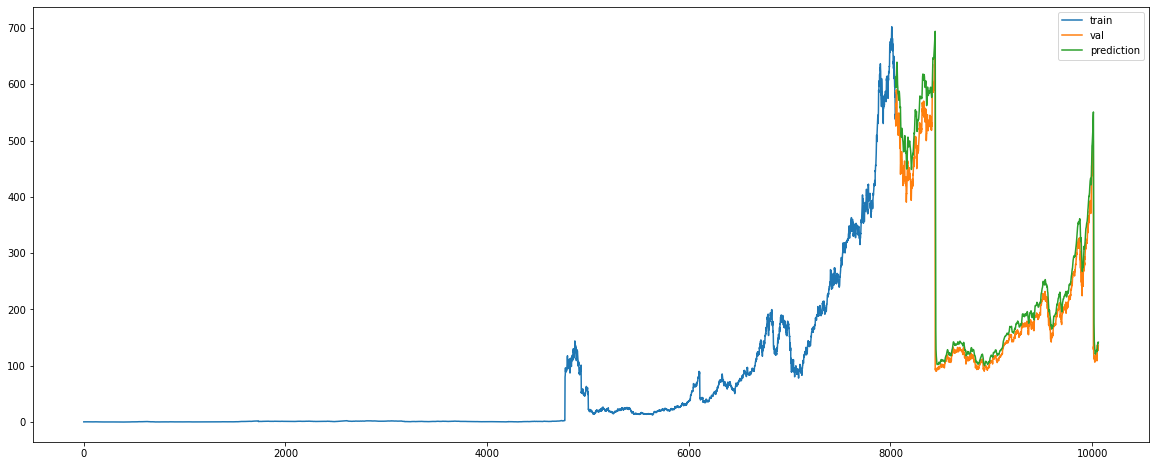

In [83]:
#plotting the final data
train = data[:training_data_len]
valid = data[training_data_len:]
valid["prediction"] = predictions
plt.figure(figsize=(20,8))
plt.plot(train.close)
plt.plot(valid[["close","prediction"]])
plt.legend(["train","val","prediction"])
plt.show()